## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Combined = pd.merge(study_results,mouse_metadata,how = "left", on="Mouse ID")

# Display the data table for preview

Combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.

Number_of_mice = Combined["Mouse ID"].nunique()
Number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use parameter "subset" to only consider certain columns to identify duplicate rows

Duplicate = Combined.loc[Combined.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
Duplicate

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

Duplicate_mouse_data = Combined[Combined["Mouse ID"] == 'g989']
Duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean = Combined.drop([107,137,329,360,620,681,815,869,950,1111,1195,1380,1592])
Clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.

Clean_number_of_mice = Clean["Mouse ID"].nunique()
Clean_number_of_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

    # Extract the columns of Mouse ID, Tumor volume, and Drug regimen

Summary = Clean[["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]
Summary.head()


    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = Summary.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean

median = Summary.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median

variance = Summary.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance

sd = Summary.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sd

sem = Summary.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem

    # Assemble the resulting series into a single summary dataframe.

Summary_statistics = pd.DataFrame({
        
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "SD":sd,
    "SEM":sem
})

    # Format to go to three decimal places and print

Summary_statistics_table = Summary_statistics.round(3)
Summary_statistics_table

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

Statistics = Clean.groupby("Drug Regimen")
Aggregate_summary = Statistics.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

 # Format to go to three decimal places and print

Aggregate_summary_table = Aggregate_summary.round(3)
Aggregate_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

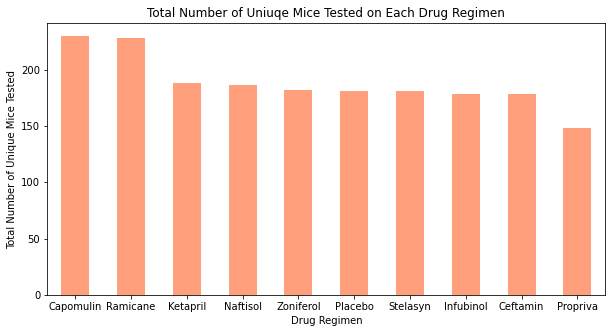

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

Unique_mice_count = Clean["Drug Regimen"].value_counts()
Unique_mice_count.plot(kind = "bar", facecolor = "coral",alpha = 0.75,figsize = (10,5))

plt.title("Total Number of Uniuqe Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice Tested")
plt.xticks(rotation = "horizontal")
plt.show()



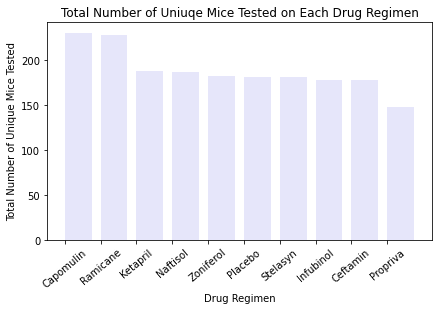

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

Unique_mice_count = Clean["Drug Regimen"].value_counts()

Drug = Unique_mice_count.index
Y = Unique_mice_count.values
X = np.arange(len(Y))

# Creat the bar plot

plt.bar(Drug,Y,color="lavender", width = 0.75,alpha = 1, align="edge")
plt.xticks(rotation = 40)
plt.tight_layout()
plt.title("Total Number of Uniuqe Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice Tested")
plt.show()


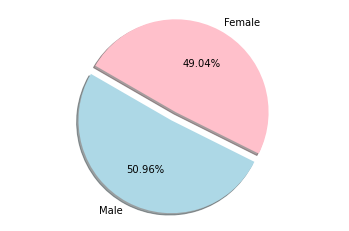

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

    # Elements to generate a pie plot
    
labels = ["Male","Female"]
size = Clean["Sex"].value_counts().values
colors = ["lightblue","pink"]
explode = (0.1,0)

    # Use pandas to generate a pie plot
    
Unique_mice_count = Clean["Sex"].value_counts()
Unique_mice_count.plot(kind = "pie", colors = colors, autopct = "%1.2f%%", shadow = True, explode = explode,startangle=150)

    # Create axes which are equal so we have a perfect circle

plt.axis("equal")

    # Show the pie plot and get rid of the y-label
    
plt.ylabel("")
plt.show()



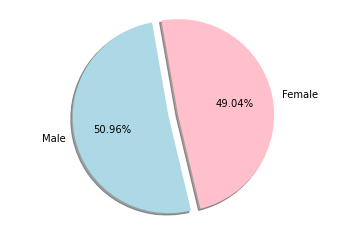

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

    # Elements to generate a pie plot
    
labels = ["Male","Female"]
size = Clean["Sex"].value_counts().values
colors = ["lightblue","pink"]
explode = (0.1,0)

    # Tell matplotlib to create a pie chart based upon the above data

plt.pie(size, labels = labels, colors = colors, autopct = "%1.2f%%", shadow = True, explode = explode,startangle=100)

    # Create axes which are equal so we have a perfect circle

plt.axis("equal")

    # Show the pie plot
    
plt.show()



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

Greatest_timepoint = Clean.groupby("Mouse ID")["Timepoint"].max().reset_index()
Greatest_timepoint

# Merge this group of df with the original dataframe to get the tumor volume at the last timepoint

Merge = pd.merge(Greatest_timepoint,Clean, on = ["Mouse ID","Timepoint"],how = "inner")
Merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

Regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)  

Tumor_volumes = []

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    
for Regimen in Regimens:

    Volume = Merge.loc[Merge["Drug Regimen"] == Regimen]["Tumor Volume (mm3)"]
    Tumor_volumes.append(Volume) 
    
     # Determine outliers using upper and lower bounds
    
    Quartile = Volume.quantile([0.25,0.5,0.75])
    Q1 = Quartile[0.25]
    Q2 = Quartile[0.5]
    Q3 = Quartile[0.75]
    IQR = Q3 - Q1
    
    Lower_bound = round(Q1 - 1.5*IQR,3)
    Upper_bound = round(Q3 + 1.5*IQR,3)
    print(f"Lower bound for {Regimen}: {Lower_bound}")
    print(f"Upper bound for {Regimen}: {Upper_bound}")
    print("----------------------------------------")

Lower bound for Capomulin: 20.705
Upper bound for Capomulin: 51.832
----------------------------------------
Lower bound for Ramicane: 17.913
Upper bound for Ramicane: 54.307
----------------------------------------
Lower bound for Infubinol: 36.833
Upper bound for Infubinol: 82.741
----------------------------------------
Lower bound for Ceftamin: 25.355
Upper bound for Ceftamin: 87.666
----------------------------------------


In [21]:
Capomulin = pd.DataFrame(Merge.loc[Merge['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])
Ramicane = pd.DataFrame(Merge.loc[Merge['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
Infubinol = pd.DataFrame(Merge.loc[Merge['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'])
Ceftamin = pd.DataFrame(Merge.loc[Merge['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'])

print(Capomulin["Tumor Volume (mm3)"].min())
print(Capomulin["Tumor Volume (mm3)"].max())
print(Ramicane["Tumor Volume (mm3)"].min())
print(Ramicane["Tumor Volume (mm3)"].max())
print(Infubinol["Tumor Volume (mm3)"].min()) ## There is one outlier for Infubinol
print(Infubinol["Tumor Volume (mm3)"].max())
print(Ceftamin["Tumor Volume (mm3)"].min())
print(Ceftamin["Tumor Volume (mm3)"].max())

23.34359787
47.68596303
22.05012627
45.22086888
36.321345799999996
72.2267309
45.0
68.92318457


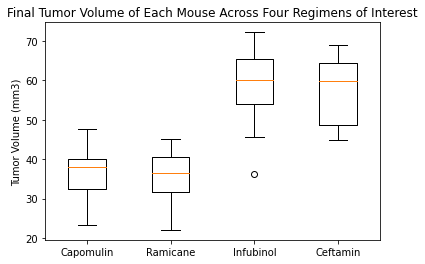

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.boxplot(Tumor_volumes)
plt.title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

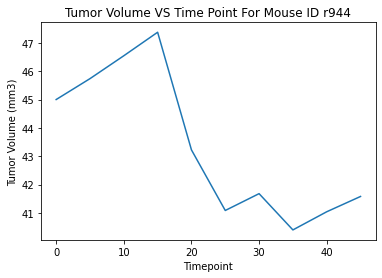

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_subject = Clean.loc[Clean["Drug Regimen"] == "Capomulin"]
Mouse = Clean.loc[Clean["Mouse ID"] == "r944"]

plt.plot(Mouse["Timepoint"], Mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume VS Time Point For Mouse ID r944")
plt.show()

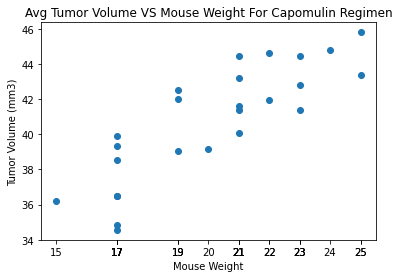

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_subject = Clean.loc[Clean["Drug Regimen"] == "Capomulin"]
Capomulin_average = Capomulin_subject.groupby(["Mouse ID"]).mean()

Weight = Capomulin_average.iloc[:,4]
Avg_tumor_volume = Capomulin_average.iloc[:,1]

plt.scatter(Weight,Avg_tumor_volume)
plt.xticks(Weight, rotation = "horizontal")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume VS Mouse Weight For Capomulin Regimen")
plt.show()


## Correlation and Regression

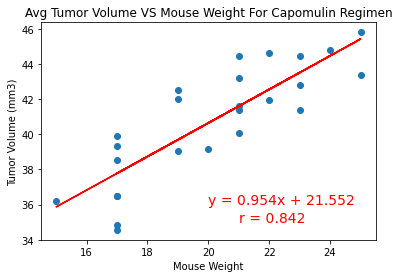

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope,intercept,rvalue,pvalue,stderr = st.linregress(Weight, Avg_tumor_volume)
Regress_value = slope * Weight + intercept
Equation = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
R = "r = " + str(round(rvalue,3))

plt.scatter(Weight,Avg_tumor_volume)
plt.plot(Weight,Regress_value,color = "red")
plt.annotate(Equation,(20,36),fontsize = 14,color = "red")
plt.annotate(R,(21,35),fontsize = 14,color = "red")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume VS Mouse Weight For Capomulin Regimen")
plt.show()